In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [5]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/"
print("data path: ", data_path)

level: mdanalysis & tutorial name: mdanalysis-tutorial
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/mdanalysis/


In [8]:
distribution_initiale = np.loadtxt(data_path + "starting_bond_distribution.dat")
bond_length, distribution_initiale = distribution_initiale.T

In [9]:
distribution_finale = np.loadtxt(data_path + "ending_bond_distribution.dat")
bond_length, distribution_finale = distribution_finale.T

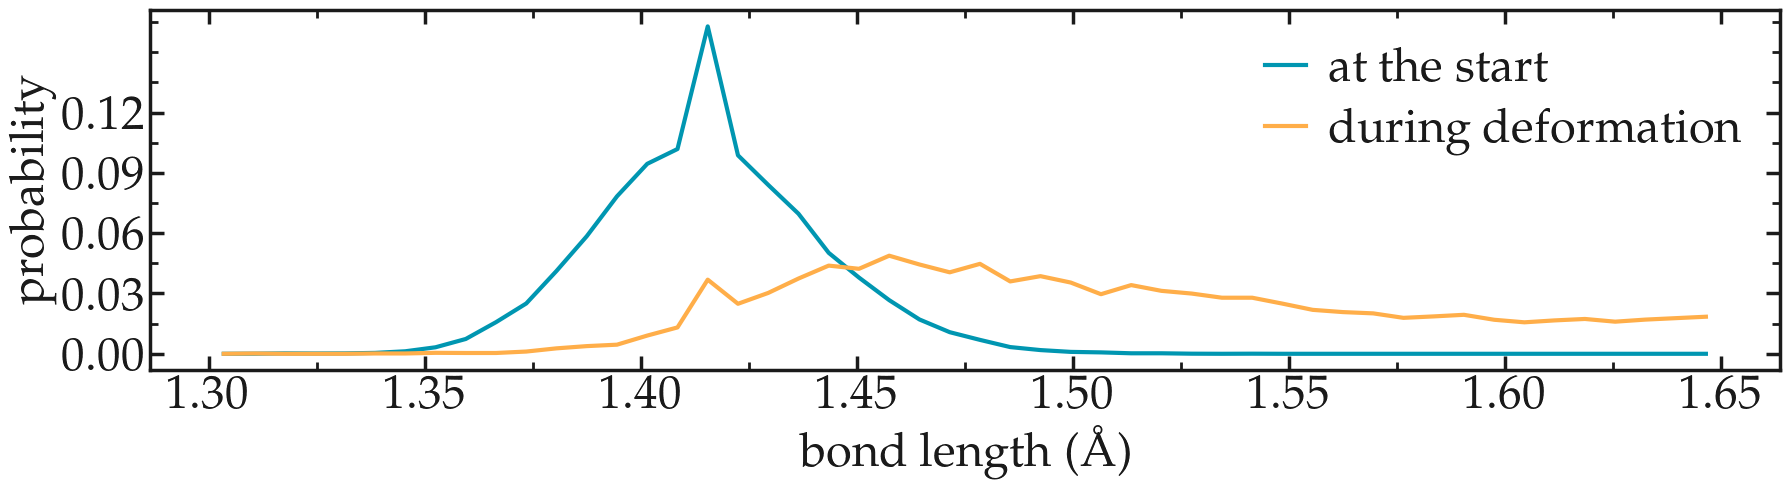

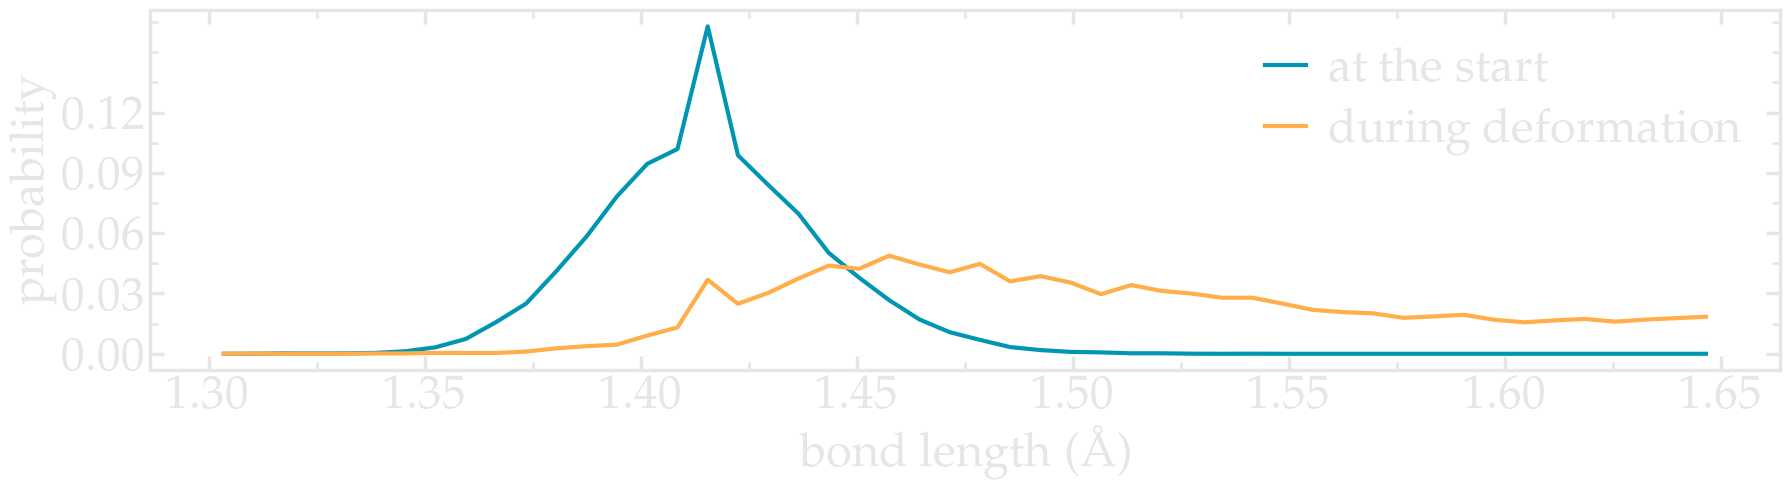

In [10]:
filename = "bond-distribution"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,5))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(bond_length, distribution_initiale/np.sum(distribution_initiale), color=colors["myblue"], linewidth=3, label="at the start")
    ax[-1].plot(bond_length, distribution_finale/np.sum(distribution_finale), color=colors["myorange"], linewidth=3, label="during deformation")
    complete_panel(ax[-1], r'bond length (\AA)', r'probability', legend=True, axis_color=mygray)
    set_boundaries(plt, y_ticks=np.arange(0, 0.13, 0.03))
    save_figure(plt, fig, mode, git_path, path_figures, filename)